# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

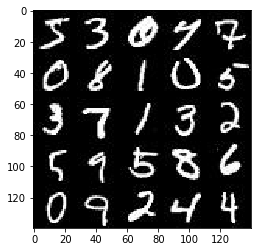

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

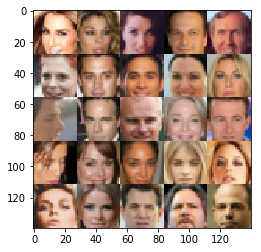

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/mithun/anaconda3/envs/dlnd-tf-lab/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    lr = tf.placeholder(tf.float32, name="learning_rate")

    return input_real, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse=reuse):
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding="same")
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d(x1, 64, 5, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d(x2, 128, 5, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        
        x4 = tf.layers.conv2d(x3, 256, 5, strides=2, padding="same")
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha*x4, x4)
        
        x4 = tf.reshape(x3, (-1, 2*2*256))
        logits = tf.layers.dense(x4, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        h1 = tf.layers.dense(z, units=4*4*512)
        h1 = tf.reshape(h1, (-1, 4, 4, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum( 0.2 * h1, h1)
        
        h2 = tf.layers.conv2d_transpose(h1, filters=128, kernel_size=4, strides=1, padding='valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(0.2 * h2, h2)
        
        h3 = tf.layers.conv2d_transpose(h2, filters=64, kernel_size=5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        
        h3 = tf.layers.conv2d_transpose(h3, filters=32, kernel_size=5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        
        logits = tf.layers.conv2d_transpose(h3, filters=out_channel_dim, kernel_size=3, strides=1, padding='same')
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z, out_channel_dim)
    disc_model_real, disc_logits_real = discriminator(input_real)
    disc_model_fake, disc_logits_fake = discriminator(gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real,
                                                                           labels=tf.ones_like(disc_model_real)*(1-0.1)))
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                           labels=tf.zeros_like(disc_model_fake)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                     labels=tf.ones_like(disc_model_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    gen_vars = [x for x in train_vars if x.name.startswith('generator')]
    disc_vars = [x for x in train_vars if x.name.startswith('discriminator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
    return disc_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_every = 100
    step = 0
    
    samples, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()

    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                steps += 1
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.8455... Generator Loss: 0.3412
Epoch 1/2... Discriminator Loss: 1.2395... Generator Loss: 0.7223
Epoch 1/2... Discriminator Loss: 1.0131... Generator Loss: 0.8944
Epoch 1/2... Discriminator Loss: 0.9888... Generator Loss: 1.0511
Epoch 1/2... Discriminator Loss: 1.0684... Generator Loss: 1.0873
Epoch 1/2... Discriminator Loss: 1.2038... Generator Loss: 0.8604
Epoch 1/2... Discriminator Loss: 1.5740... Generator Loss: 0.7207
Epoch 1/2... Discriminator Loss: 1.4487... Generator Loss: 0.7740
Epoch 1/2... Discriminator Loss: 1.3475... Generator Loss: 0.9293
Epoch 1/2... Discriminator Loss: 1.0396... Generator Loss: 1.1201


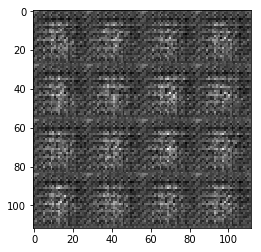

Epoch 1/2... Discriminator Loss: 1.0648... Generator Loss: 1.0720
Epoch 1/2... Discriminator Loss: 0.9822... Generator Loss: 1.2926
Epoch 1/2... Discriminator Loss: 0.9057... Generator Loss: 1.1270
Epoch 1/2... Discriminator Loss: 0.9728... Generator Loss: 1.2352
Epoch 1/2... Discriminator Loss: 0.8485... Generator Loss: 1.4309
Epoch 1/2... Discriminator Loss: 1.1868... Generator Loss: 0.9882
Epoch 1/2... Discriminator Loss: 1.1233... Generator Loss: 0.9800
Epoch 1/2... Discriminator Loss: 1.3025... Generator Loss: 0.8822
Epoch 1/2... Discriminator Loss: 1.1792... Generator Loss: 0.8757
Epoch 1/2... Discriminator Loss: 1.0897... Generator Loss: 1.0270


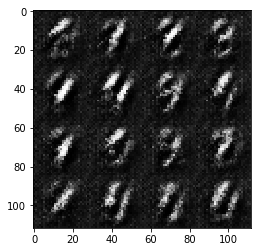

Epoch 1/2... Discriminator Loss: 0.9612... Generator Loss: 1.3209
Epoch 1/2... Discriminator Loss: 1.0798... Generator Loss: 1.0899
Epoch 1/2... Discriminator Loss: 1.2482... Generator Loss: 0.9327
Epoch 1/2... Discriminator Loss: 1.4485... Generator Loss: 0.7998
Epoch 1/2... Discriminator Loss: 1.3263... Generator Loss: 0.7746
Epoch 1/2... Discriminator Loss: 1.3105... Generator Loss: 0.7212
Epoch 1/2... Discriminator Loss: 1.0326... Generator Loss: 1.2584
Epoch 1/2... Discriminator Loss: 1.4110... Generator Loss: 0.6938
Epoch 1/2... Discriminator Loss: 1.2581... Generator Loss: 1.0326
Epoch 1/2... Discriminator Loss: 1.2131... Generator Loss: 0.9649


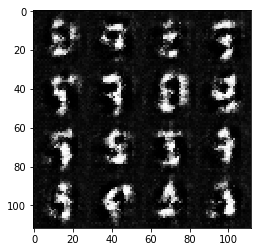

Epoch 1/2... Discriminator Loss: 1.1557... Generator Loss: 0.9955
Epoch 1/2... Discriminator Loss: 1.2379... Generator Loss: 0.8779
Epoch 1/2... Discriminator Loss: 1.2145... Generator Loss: 0.9350
Epoch 1/2... Discriminator Loss: 1.3055... Generator Loss: 0.6480
Epoch 1/2... Discriminator Loss: 1.1923... Generator Loss: 0.9587
Epoch 1/2... Discriminator Loss: 1.1453... Generator Loss: 1.0500
Epoch 1/2... Discriminator Loss: 1.2067... Generator Loss: 1.1369
Epoch 1/2... Discriminator Loss: 1.1240... Generator Loss: 1.0925
Epoch 1/2... Discriminator Loss: 1.1406... Generator Loss: 1.2299
Epoch 1/2... Discriminator Loss: 1.2208... Generator Loss: 0.7119


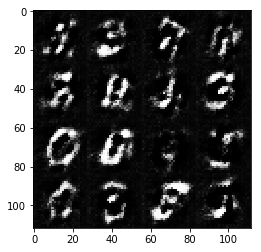

Epoch 1/2... Discriminator Loss: 1.2035... Generator Loss: 0.6771
Epoch 1/2... Discriminator Loss: 1.2686... Generator Loss: 1.5242
Epoch 1/2... Discriminator Loss: 1.1273... Generator Loss: 1.1895
Epoch 1/2... Discriminator Loss: 1.1324... Generator Loss: 0.8446
Epoch 1/2... Discriminator Loss: 1.1277... Generator Loss: 1.2791
Epoch 1/2... Discriminator Loss: 1.1681... Generator Loss: 1.0458
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 0.9461
Epoch 1/2... Discriminator Loss: 1.1289... Generator Loss: 1.0738
Epoch 1/2... Discriminator Loss: 1.1558... Generator Loss: 1.2274
Epoch 1/2... Discriminator Loss: 1.1262... Generator Loss: 0.9241


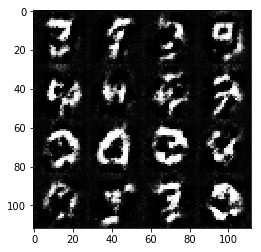

Epoch 1/2... Discriminator Loss: 1.1964... Generator Loss: 0.7792
Epoch 1/2... Discriminator Loss: 1.1403... Generator Loss: 0.8880
Epoch 1/2... Discriminator Loss: 1.1361... Generator Loss: 0.8308
Epoch 1/2... Discriminator Loss: 1.0590... Generator Loss: 1.2004
Epoch 1/2... Discriminator Loss: 1.0961... Generator Loss: 1.1759
Epoch 1/2... Discriminator Loss: 1.2832... Generator Loss: 0.5971
Epoch 1/2... Discriminator Loss: 1.2391... Generator Loss: 0.8033
Epoch 1/2... Discriminator Loss: 1.0773... Generator Loss: 0.8555
Epoch 1/2... Discriminator Loss: 1.1925... Generator Loss: 0.6689
Epoch 1/2... Discriminator Loss: 1.0320... Generator Loss: 1.0410


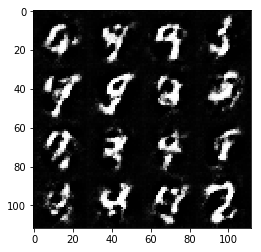

Epoch 1/2... Discriminator Loss: 1.0579... Generator Loss: 1.1981
Epoch 1/2... Discriminator Loss: 1.1968... Generator Loss: 1.3894
Epoch 1/2... Discriminator Loss: 1.1148... Generator Loss: 1.0146
Epoch 1/2... Discriminator Loss: 1.0216... Generator Loss: 0.8545
Epoch 1/2... Discriminator Loss: 1.0836... Generator Loss: 1.0779
Epoch 1/2... Discriminator Loss: 1.0962... Generator Loss: 1.2279
Epoch 1/2... Discriminator Loss: 1.1329... Generator Loss: 1.3818
Epoch 1/2... Discriminator Loss: 1.1229... Generator Loss: 0.8521
Epoch 1/2... Discriminator Loss: 1.0570... Generator Loss: 1.0487
Epoch 1/2... Discriminator Loss: 1.0847... Generator Loss: 0.9145


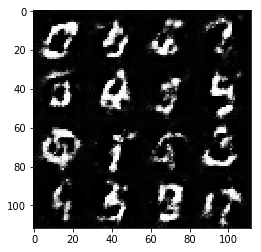

Epoch 1/2... Discriminator Loss: 1.3255... Generator Loss: 0.5443
Epoch 1/2... Discriminator Loss: 1.0673... Generator Loss: 1.0091
Epoch 1/2... Discriminator Loss: 1.1162... Generator Loss: 0.8495
Epoch 1/2... Discriminator Loss: 1.0805... Generator Loss: 1.3766
Epoch 1/2... Discriminator Loss: 1.0822... Generator Loss: 1.0921
Epoch 1/2... Discriminator Loss: 1.1058... Generator Loss: 1.0270
Epoch 1/2... Discriminator Loss: 1.1766... Generator Loss: 0.7991
Epoch 1/2... Discriminator Loss: 1.3052... Generator Loss: 0.5981
Epoch 1/2... Discriminator Loss: 1.1459... Generator Loss: 0.9866
Epoch 1/2... Discriminator Loss: 1.1259... Generator Loss: 0.9974


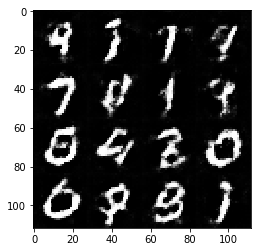

Epoch 1/2... Discriminator Loss: 1.1690... Generator Loss: 0.9596
Epoch 1/2... Discriminator Loss: 1.1840... Generator Loss: 1.0954
Epoch 1/2... Discriminator Loss: 1.3263... Generator Loss: 0.5470
Epoch 1/2... Discriminator Loss: 1.1507... Generator Loss: 1.4073
Epoch 1/2... Discriminator Loss: 1.1771... Generator Loss: 0.7628
Epoch 1/2... Discriminator Loss: 1.2271... Generator Loss: 0.7552
Epoch 1/2... Discriminator Loss: 1.4090... Generator Loss: 1.2663
Epoch 1/2... Discriminator Loss: 1.0845... Generator Loss: 1.0635
Epoch 1/2... Discriminator Loss: 1.2219... Generator Loss: 0.7275
Epoch 1/2... Discriminator Loss: 1.1486... Generator Loss: 1.0900


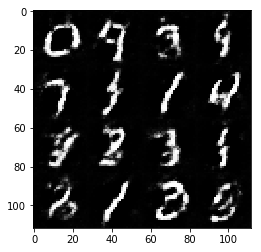

Epoch 1/2... Discriminator Loss: 1.1956... Generator Loss: 0.8654
Epoch 1/2... Discriminator Loss: 1.0904... Generator Loss: 0.9567
Epoch 1/2... Discriminator Loss: 1.2326... Generator Loss: 0.7723
Epoch 2/2... Discriminator Loss: 1.3161... Generator Loss: 0.5928
Epoch 2/2... Discriminator Loss: 1.1542... Generator Loss: 1.3744
Epoch 2/2... Discriminator Loss: 1.2997... Generator Loss: 0.6020
Epoch 2/2... Discriminator Loss: 1.2861... Generator Loss: 1.0816
Epoch 2/2... Discriminator Loss: 1.3112... Generator Loss: 0.6186
Epoch 2/2... Discriminator Loss: 1.2307... Generator Loss: 0.9237
Epoch 2/2... Discriminator Loss: 1.3290... Generator Loss: 0.7838


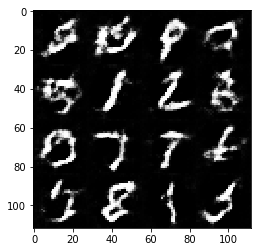

Epoch 2/2... Discriminator Loss: 1.2394... Generator Loss: 0.7078
Epoch 2/2... Discriminator Loss: 1.2955... Generator Loss: 1.5024
Epoch 2/2... Discriminator Loss: 1.2603... Generator Loss: 1.2552
Epoch 2/2... Discriminator Loss: 1.2758... Generator Loss: 1.0721
Epoch 2/2... Discriminator Loss: 1.1359... Generator Loss: 0.9850
Epoch 2/2... Discriminator Loss: 1.2263... Generator Loss: 0.7691
Epoch 2/2... Discriminator Loss: 1.3899... Generator Loss: 0.8225
Epoch 2/2... Discriminator Loss: 1.2484... Generator Loss: 1.3585
Epoch 2/2... Discriminator Loss: 1.2059... Generator Loss: 0.8350
Epoch 2/2... Discriminator Loss: 1.2125... Generator Loss: 0.8359


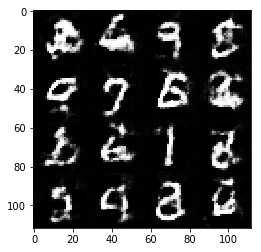

Epoch 2/2... Discriminator Loss: 1.0575... Generator Loss: 1.1311
Epoch 2/2... Discriminator Loss: 1.1708... Generator Loss: 1.0588
Epoch 2/2... Discriminator Loss: 1.1513... Generator Loss: 1.0284
Epoch 2/2... Discriminator Loss: 1.1403... Generator Loss: 0.8897
Epoch 2/2... Discriminator Loss: 1.3143... Generator Loss: 0.6339
Epoch 2/2... Discriminator Loss: 1.2650... Generator Loss: 0.9971
Epoch 2/2... Discriminator Loss: 1.2976... Generator Loss: 1.1725
Epoch 2/2... Discriminator Loss: 1.3054... Generator Loss: 0.6393
Epoch 2/2... Discriminator Loss: 1.3319... Generator Loss: 0.5889
Epoch 2/2... Discriminator Loss: 1.1836... Generator Loss: 0.8614


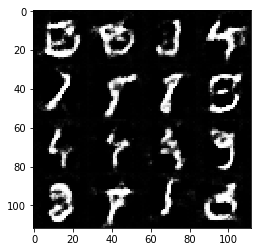

Epoch 2/2... Discriminator Loss: 1.1582... Generator Loss: 0.7907
Epoch 2/2... Discriminator Loss: 1.2225... Generator Loss: 1.0328
Epoch 2/2... Discriminator Loss: 1.2891... Generator Loss: 0.9024
Epoch 2/2... Discriminator Loss: 1.1658... Generator Loss: 0.9051
Epoch 2/2... Discriminator Loss: 1.2435... Generator Loss: 1.0179
Epoch 2/2... Discriminator Loss: 1.1549... Generator Loss: 0.9936
Epoch 2/2... Discriminator Loss: 1.3275... Generator Loss: 0.8096
Epoch 2/2... Discriminator Loss: 1.1895... Generator Loss: 1.0548
Epoch 2/2... Discriminator Loss: 1.1916... Generator Loss: 1.0308
Epoch 2/2... Discriminator Loss: 1.2978... Generator Loss: 1.0355


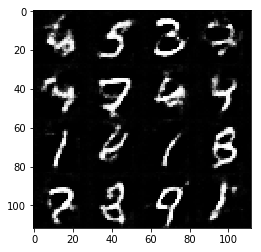

Epoch 2/2... Discriminator Loss: 1.2642... Generator Loss: 0.9581
Epoch 2/2... Discriminator Loss: 1.3737... Generator Loss: 1.2014
Epoch 2/2... Discriminator Loss: 1.2064... Generator Loss: 0.9304
Epoch 2/2... Discriminator Loss: 1.2470... Generator Loss: 0.9442
Epoch 2/2... Discriminator Loss: 1.3016... Generator Loss: 0.8567
Epoch 2/2... Discriminator Loss: 1.2522... Generator Loss: 0.7028
Epoch 2/2... Discriminator Loss: 1.1530... Generator Loss: 1.0536
Epoch 2/2... Discriminator Loss: 1.2242... Generator Loss: 0.8827
Epoch 2/2... Discriminator Loss: 1.2422... Generator Loss: 0.9164
Epoch 2/2... Discriminator Loss: 1.2787... Generator Loss: 1.0106


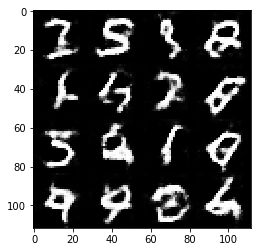

Epoch 2/2... Discriminator Loss: 1.3451... Generator Loss: 0.5640
Epoch 2/2... Discriminator Loss: 1.3150... Generator Loss: 0.9954
Epoch 2/2... Discriminator Loss: 1.2743... Generator Loss: 0.8182
Epoch 2/2... Discriminator Loss: 1.1590... Generator Loss: 1.1999
Epoch 2/2... Discriminator Loss: 1.2333... Generator Loss: 0.8165
Epoch 2/2... Discriminator Loss: 1.2353... Generator Loss: 0.7592
Epoch 2/2... Discriminator Loss: 1.2694... Generator Loss: 0.7687
Epoch 2/2... Discriminator Loss: 1.1885... Generator Loss: 0.9593
Epoch 2/2... Discriminator Loss: 1.2769... Generator Loss: 0.6954
Epoch 2/2... Discriminator Loss: 1.1929... Generator Loss: 1.0366


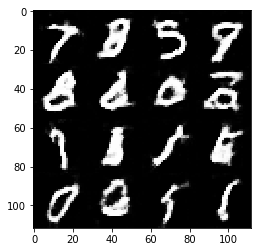

Epoch 2/2... Discriminator Loss: 1.2656... Generator Loss: 0.7212
Epoch 2/2... Discriminator Loss: 1.2283... Generator Loss: 1.2048
Epoch 2/2... Discriminator Loss: 1.2184... Generator Loss: 0.9998
Epoch 2/2... Discriminator Loss: 1.1869... Generator Loss: 1.2799
Epoch 2/2... Discriminator Loss: 1.1370... Generator Loss: 0.8768
Epoch 2/2... Discriminator Loss: 1.2610... Generator Loss: 0.7423
Epoch 2/2... Discriminator Loss: 1.2511... Generator Loss: 0.8205
Epoch 2/2... Discriminator Loss: 1.2854... Generator Loss: 0.6572
Epoch 2/2... Discriminator Loss: 1.2419... Generator Loss: 0.9263
Epoch 2/2... Discriminator Loss: 1.2387... Generator Loss: 1.0303


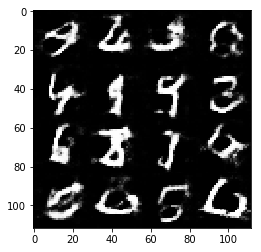

Epoch 2/2... Discriminator Loss: 1.2777... Generator Loss: 0.7457
Epoch 2/2... Discriminator Loss: 1.2131... Generator Loss: 1.0292
Epoch 2/2... Discriminator Loss: 1.3349... Generator Loss: 0.6217
Epoch 2/2... Discriminator Loss: 1.3079... Generator Loss: 0.7393
Epoch 2/2... Discriminator Loss: 1.2241... Generator Loss: 1.0428
Epoch 2/2... Discriminator Loss: 1.1904... Generator Loss: 0.9909
Epoch 2/2... Discriminator Loss: 1.3221... Generator Loss: 0.5977
Epoch 2/2... Discriminator Loss: 1.1818... Generator Loss: 0.7438
Epoch 2/2... Discriminator Loss: 1.1936... Generator Loss: 0.8258
Epoch 2/2... Discriminator Loss: 1.2408... Generator Loss: 0.7248


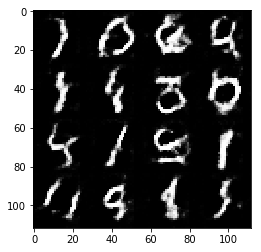

Epoch 2/2... Discriminator Loss: 1.2974... Generator Loss: 0.8167
Epoch 2/2... Discriminator Loss: 1.2392... Generator Loss: 0.8291
Epoch 2/2... Discriminator Loss: 1.2504... Generator Loss: 0.8511
Epoch 2/2... Discriminator Loss: 1.2537... Generator Loss: 1.0593
Epoch 2/2... Discriminator Loss: 1.1407... Generator Loss: 0.9698
Epoch 2/2... Discriminator Loss: 1.1145... Generator Loss: 1.0713
Epoch 2/2... Discriminator Loss: 1.2366... Generator Loss: 0.9613
Epoch 2/2... Discriminator Loss: 1.3000... Generator Loss: 0.6184
Epoch 2/2... Discriminator Loss: 1.1136... Generator Loss: 0.8434
Epoch 2/2... Discriminator Loss: 1.1317... Generator Loss: 1.0510


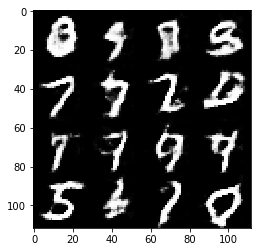

Epoch 2/2... Discriminator Loss: 1.2963... Generator Loss: 0.9063
Epoch 2/2... Discriminator Loss: 1.2616... Generator Loss: 0.8110
Epoch 2/2... Discriminator Loss: 1.2059... Generator Loss: 0.7421
Epoch 2/2... Discriminator Loss: 1.1885... Generator Loss: 0.9478
Epoch 2/2... Discriminator Loss: 1.1614... Generator Loss: 1.0461
Epoch 2/2... Discriminator Loss: 1.2158... Generator Loss: 1.0605
Epoch 2/2... Discriminator Loss: 1.1127... Generator Loss: 0.9943


In [12]:
batch_size = 64
z_dim = 128
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.0448... Generator Loss: 0.3353
Epoch 1/1... Discriminator Loss: 1.3413... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 0.9225
Epoch 1/1... Discriminator Loss: 1.2709... Generator Loss: 0.6931
Epoch 1/1... Discriminator Loss: 0.8878... Generator Loss: 1.7469
Epoch 1/1... Discriminator Loss: 0.8087... Generator Loss: 1.5344
Epoch 1/1... Discriminator Loss: 0.7711... Generator Loss: 1.2865
Epoch 1/1... Discriminator Loss: 0.9675... Generator Loss: 2.6338
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 1.2121
Epoch 1/1... Discriminator Loss: 1.0924... Generator Loss: 1.0490


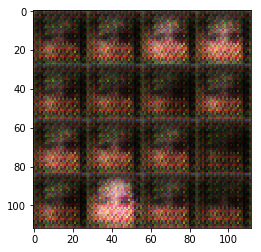

Epoch 1/1... Discriminator Loss: 1.1264... Generator Loss: 1.2622
Epoch 1/1... Discriminator Loss: 1.2766... Generator Loss: 1.3218
Epoch 1/1... Discriminator Loss: 1.0880... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 1.1127
Epoch 1/1... Discriminator Loss: 1.3594... Generator Loss: 1.3791
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 1.0148
Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 1.3988
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 1.7012
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 0.7833


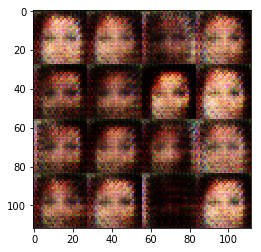

Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 0.9246
Epoch 1/1... Discriminator Loss: 1.4255... Generator Loss: 0.4891
Epoch 1/1... Discriminator Loss: 1.0809... Generator Loss: 1.1614
Epoch 1/1... Discriminator Loss: 1.3468... Generator Loss: 1.7477
Epoch 1/1... Discriminator Loss: 1.0522... Generator Loss: 1.0775
Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 0.9742
Epoch 1/1... Discriminator Loss: 0.9279... Generator Loss: 1.6426
Epoch 1/1... Discriminator Loss: 1.0281... Generator Loss: 1.3712
Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.1049
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 0.9637


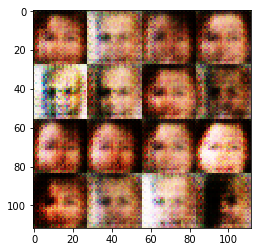

Epoch 1/1... Discriminator Loss: 1.1002... Generator Loss: 1.2912
Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 1.6900
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 1.5740
Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 1.3047
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 1.4637
Epoch 1/1... Discriminator Loss: 0.9767... Generator Loss: 2.0806
Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.5338
Epoch 1/1... Discriminator Loss: 1.0358... Generator Loss: 1.2942
Epoch 1/1... Discriminator Loss: 1.1158... Generator Loss: 1.1138
Epoch 1/1... Discriminator Loss: 1.0303... Generator Loss: 1.3413


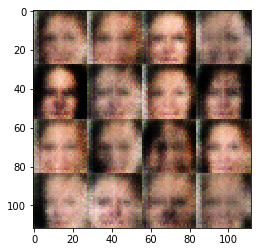

Epoch 1/1... Discriminator Loss: 1.4917... Generator Loss: 0.4557
Epoch 1/1... Discriminator Loss: 0.9938... Generator Loss: 1.2419
Epoch 1/1... Discriminator Loss: 1.2385... Generator Loss: 0.9032
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 1.9584
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 1.2406
Epoch 1/1... Discriminator Loss: 1.0883... Generator Loss: 1.0075
Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 1.1781... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.2283... Generator Loss: 0.9199
Epoch 1/1... Discriminator Loss: 1.1266... Generator Loss: 1.6624


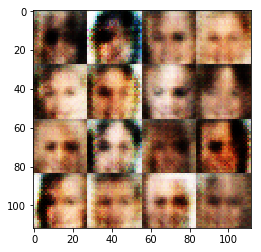

Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 1.5873... Generator Loss: 0.4889
Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 1.8012
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 0.7389... Generator Loss: 1.7752
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 1.2463
Epoch 1/1... Discriminator Loss: 1.0415... Generator Loss: 1.3488
Epoch 1/1... Discriminator Loss: 1.1127... Generator Loss: 0.9400
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 0.8410


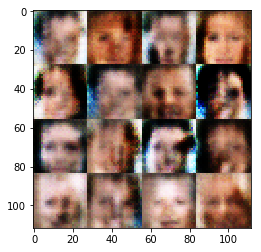

Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.4703
Epoch 1/1... Discriminator Loss: 0.7507... Generator Loss: 1.6150
Epoch 1/1... Discriminator Loss: 1.0163... Generator Loss: 0.9439
Epoch 1/1... Discriminator Loss: 0.7568... Generator Loss: 1.9111
Epoch 1/1... Discriminator Loss: 0.7910... Generator Loss: 2.0175
Epoch 1/1... Discriminator Loss: 0.9150... Generator Loss: 1.3640
Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 1.5371
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 2.7346
Epoch 1/1... Discriminator Loss: 0.8324... Generator Loss: 1.7154


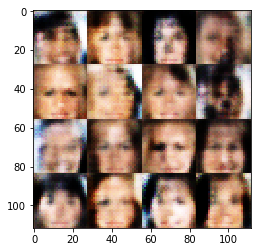

Epoch 1/1... Discriminator Loss: 0.9512... Generator Loss: 1.1547
Epoch 1/1... Discriminator Loss: 1.0591... Generator Loss: 2.2689
Epoch 1/1... Discriminator Loss: 0.8011... Generator Loss: 1.3597
Epoch 1/1... Discriminator Loss: 0.8228... Generator Loss: 1.3593
Epoch 1/1... Discriminator Loss: 0.7925... Generator Loss: 1.2840
Epoch 1/1... Discriminator Loss: 0.6411... Generator Loss: 1.7706
Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.9770
Epoch 1/1... Discriminator Loss: 0.7818... Generator Loss: 1.3521


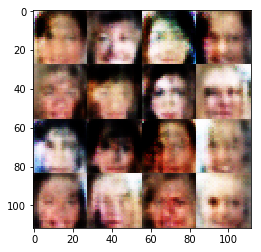

Epoch 1/1... Discriminator Loss: 0.7451... Generator Loss: 1.5987
Epoch 1/1... Discriminator Loss: 0.7224... Generator Loss: 1.5105
Epoch 1/1... Discriminator Loss: 1.8293... Generator Loss: 2.8650
Epoch 1/1... Discriminator Loss: 0.7192... Generator Loss: 1.4357
Epoch 1/1... Discriminator Loss: 0.8757... Generator Loss: 2.9560
Epoch 1/1... Discriminator Loss: 0.8457... Generator Loss: 2.3841
Epoch 1/1... Discriminator Loss: 0.7681... Generator Loss: 1.4135
Epoch 1/1... Discriminator Loss: 0.8140... Generator Loss: 1.1659
Epoch 1/1... Discriminator Loss: 0.8154... Generator Loss: 1.9817
Epoch 1/1... Discriminator Loss: 0.8631... Generator Loss: 1.3178


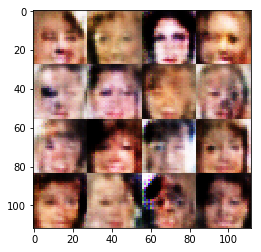

Epoch 1/1... Discriminator Loss: 0.7602... Generator Loss: 1.3427
Epoch 1/1... Discriminator Loss: 1.0573... Generator Loss: 2.4473
Epoch 1/1... Discriminator Loss: 0.8691... Generator Loss: 1.2613
Epoch 1/1... Discriminator Loss: 0.8030... Generator Loss: 1.1300
Epoch 1/1... Discriminator Loss: 0.7226... Generator Loss: 2.5267
Epoch 1/1... Discriminator Loss: 0.9802... Generator Loss: 3.0626
Epoch 1/1... Discriminator Loss: 0.8405... Generator Loss: 1.1346
Epoch 1/1... Discriminator Loss: 0.8187... Generator Loss: 1.5802
Epoch 1/1... Discriminator Loss: 0.7211... Generator Loss: 1.6837
Epoch 1/1... Discriminator Loss: 1.1328... Generator Loss: 2.2170


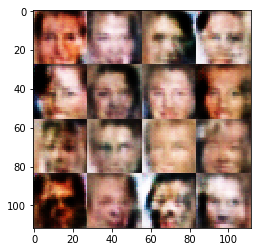

Epoch 1/1... Discriminator Loss: 0.7429... Generator Loss: 1.8058
Epoch 1/1... Discriminator Loss: 0.8402... Generator Loss: 1.3450
Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 0.8760... Generator Loss: 1.3898
Epoch 1/1... Discriminator Loss: 0.7079... Generator Loss: 2.1589
Epoch 1/1... Discriminator Loss: 0.7741... Generator Loss: 1.4015
Epoch 1/1... Discriminator Loss: 0.6866... Generator Loss: 1.5822
Epoch 1/1... Discriminator Loss: 0.9472... Generator Loss: 0.9591
Epoch 1/1... Discriminator Loss: 0.7360... Generator Loss: 1.3369
Epoch 1/1... Discriminator Loss: 0.7331... Generator Loss: 1.6115


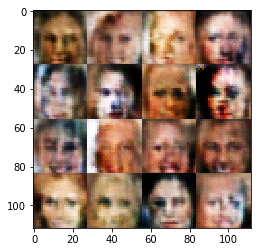

Epoch 1/1... Discriminator Loss: 0.7523... Generator Loss: 1.7794
Epoch 1/1... Discriminator Loss: 0.6513... Generator Loss: 2.2090
Epoch 1/1... Discriminator Loss: 0.8166... Generator Loss: 1.3515
Epoch 1/1... Discriminator Loss: 0.7490... Generator Loss: 1.3605
Epoch 1/1... Discriminator Loss: 0.8584... Generator Loss: 1.6845
Epoch 1/1... Discriminator Loss: 0.8392... Generator Loss: 1.1856
Epoch 1/1... Discriminator Loss: 0.9211... Generator Loss: 1.5459
Epoch 1/1... Discriminator Loss: 0.7513... Generator Loss: 1.5570
Epoch 1/1... Discriminator Loss: 0.7618... Generator Loss: 1.3615
Epoch 1/1... Discriminator Loss: 1.1959... Generator Loss: 2.4966


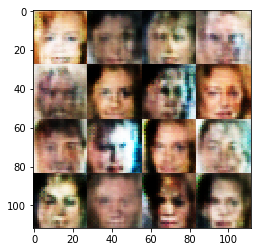

Epoch 1/1... Discriminator Loss: 0.9022... Generator Loss: 1.1577
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 2.5269
Epoch 1/1... Discriminator Loss: 0.6235... Generator Loss: 2.5126
Epoch 1/1... Discriminator Loss: 0.6370... Generator Loss: 2.0360
Epoch 1/1... Discriminator Loss: 0.9145... Generator Loss: 2.0669
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 1.1832
Epoch 1/1... Discriminator Loss: 0.7422... Generator Loss: 1.7751
Epoch 1/1... Discriminator Loss: 0.9357... Generator Loss: 2.3998
Epoch 1/1... Discriminator Loss: 0.9069... Generator Loss: 1.0084
Epoch 1/1... Discriminator Loss: 0.9796... Generator Loss: 1.5207


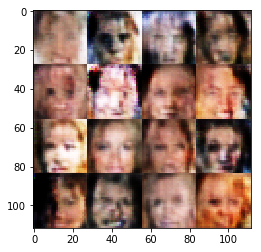

Epoch 1/1... Discriminator Loss: 0.8203... Generator Loss: 3.2950
Epoch 1/1... Discriminator Loss: 0.8139... Generator Loss: 1.5009
Epoch 1/1... Discriminator Loss: 0.8484... Generator Loss: 1.2745
Epoch 1/1... Discriminator Loss: 0.8293... Generator Loss: 1.9880
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 0.7324... Generator Loss: 1.7255
Epoch 1/1... Discriminator Loss: 0.9106... Generator Loss: 1.1315
Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 0.8393
Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 1.5206
Epoch 1/1... Discriminator Loss: 0.7323... Generator Loss: 2.2449


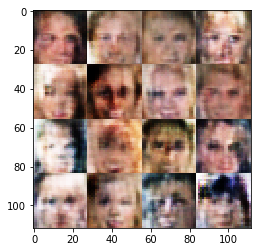

Epoch 1/1... Discriminator Loss: 0.7226... Generator Loss: 1.7298
Epoch 1/1... Discriminator Loss: 1.6817... Generator Loss: 0.3535
Epoch 1/1... Discriminator Loss: 1.2818... Generator Loss: 1.9604
Epoch 1/1... Discriminator Loss: 1.1660... Generator Loss: 0.7740
Epoch 1/1... Discriminator Loss: 0.8185... Generator Loss: 1.5045
Epoch 1/1... Discriminator Loss: 0.8847... Generator Loss: 1.9233
Epoch 1/1... Discriminator Loss: 1.0670... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 0.6937... Generator Loss: 1.5718
Epoch 1/1... Discriminator Loss: 0.7309... Generator Loss: 1.6247
Epoch 1/1... Discriminator Loss: 0.6875... Generator Loss: 1.7850


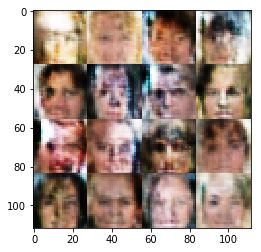

Epoch 1/1... Discriminator Loss: 0.7974... Generator Loss: 1.2575
Epoch 1/1... Discriminator Loss: 0.6766... Generator Loss: 1.7456
Epoch 1/1... Discriminator Loss: 0.6843... Generator Loss: 2.3561
Epoch 1/1... Discriminator Loss: 1.5179... Generator Loss: 2.0241
Epoch 1/1... Discriminator Loss: 0.9197... Generator Loss: 1.1332
Epoch 1/1... Discriminator Loss: 0.7405... Generator Loss: 1.4626
Epoch 1/1... Discriminator Loss: 1.0160... Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 0.8127... Generator Loss: 1.2856
Epoch 1/1... Discriminator Loss: 0.8860... Generator Loss: 1.1642
Epoch 1/1... Discriminator Loss: 0.8998... Generator Loss: 1.7344


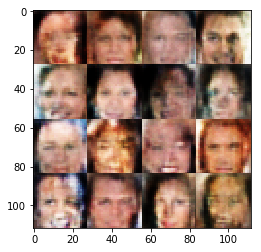

Epoch 1/1... Discriminator Loss: 0.6923... Generator Loss: 1.4689
Epoch 1/1... Discriminator Loss: 0.9197... Generator Loss: 1.1474
Epoch 1/1... Discriminator Loss: 0.8622... Generator Loss: 1.3266
Epoch 1/1... Discriminator Loss: 0.8591... Generator Loss: 1.4994
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 0.9241
Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 1.3619
Epoch 1/1... Discriminator Loss: 1.0560... Generator Loss: 0.7659
Epoch 1/1... Discriminator Loss: 0.8147... Generator Loss: 1.3547
Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 0.8915
Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 1.7179


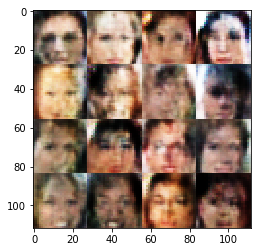

Epoch 1/1... Discriminator Loss: 0.8142... Generator Loss: 1.1692
Epoch 1/1... Discriminator Loss: 0.8861... Generator Loss: 1.0355
Epoch 1/1... Discriminator Loss: 1.1449... Generator Loss: 1.8132
Epoch 1/1... Discriminator Loss: 0.9216... Generator Loss: 1.1482
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.9765
Epoch 1/1... Discriminator Loss: 0.7062... Generator Loss: 1.8143
Epoch 1/1... Discriminator Loss: 0.8537... Generator Loss: 1.3635
Epoch 1/1... Discriminator Loss: 0.8689... Generator Loss: 1.3947
Epoch 1/1... Discriminator Loss: 0.8018... Generator Loss: 1.4545
Epoch 1/1... Discriminator Loss: 0.9371... Generator Loss: 0.9786


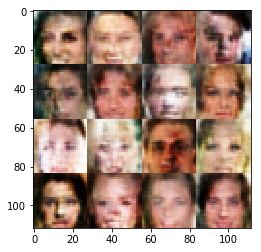

Epoch 1/1... Discriminator Loss: 0.8042... Generator Loss: 1.4374
Epoch 1/1... Discriminator Loss: 0.8633... Generator Loss: 1.1081
Epoch 1/1... Discriminator Loss: 0.7051... Generator Loss: 1.5354
Epoch 1/1... Discriminator Loss: 0.7821... Generator Loss: 1.2038
Epoch 1/1... Discriminator Loss: 0.9223... Generator Loss: 1.0769
Epoch 1/1... Discriminator Loss: 0.8682... Generator Loss: 1.0371
Epoch 1/1... Discriminator Loss: 0.7101... Generator Loss: 1.4071
Epoch 1/1... Discriminator Loss: 1.0641... Generator Loss: 0.8332
Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 1.2108
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 0.9771


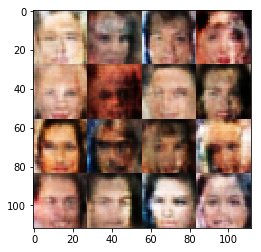

Epoch 1/1... Discriminator Loss: 0.7708... Generator Loss: 1.3982
Epoch 1/1... Discriminator Loss: 0.8733... Generator Loss: 1.5172
Epoch 1/1... Discriminator Loss: 0.7483... Generator Loss: 1.2918
Epoch 1/1... Discriminator Loss: 0.8981... Generator Loss: 1.1715
Epoch 1/1... Discriminator Loss: 0.8997... Generator Loss: 1.0887
Epoch 1/1... Discriminator Loss: 0.8321... Generator Loss: 2.1892
Epoch 1/1... Discriminator Loss: 0.8413... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 0.5856... Generator Loss: 2.2021
Epoch 1/1... Discriminator Loss: 0.7312... Generator Loss: 1.7323
Epoch 1/1... Discriminator Loss: 0.9706... Generator Loss: 0.9989


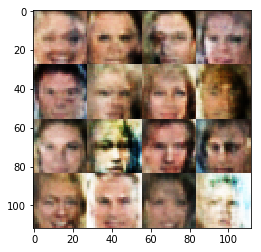

Epoch 1/1... Discriminator Loss: 2.2562... Generator Loss: 0.2041
Epoch 1/1... Discriminator Loss: 1.0404... Generator Loss: 0.9284
Epoch 1/1... Discriminator Loss: 0.8692... Generator Loss: 1.2786
Epoch 1/1... Discriminator Loss: 0.9147... Generator Loss: 1.0956
Epoch 1/1... Discriminator Loss: 0.7564... Generator Loss: 1.7109
Epoch 1/1... Discriminator Loss: 0.9624... Generator Loss: 0.9720
Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 0.8287... Generator Loss: 1.2641
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 1.5345
Epoch 1/1... Discriminator Loss: 0.8585... Generator Loss: 1.1826


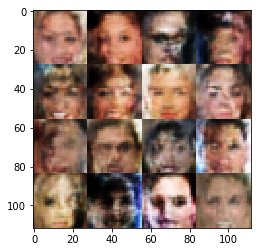

Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.1939
Epoch 1/1... Discriminator Loss: 0.7891... Generator Loss: 1.5741
Epoch 1/1... Discriminator Loss: 1.0210... Generator Loss: 1.0996
Epoch 1/1... Discriminator Loss: 0.9988... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 2.0341
Epoch 1/1... Discriminator Loss: 0.9651... Generator Loss: 1.0196
Epoch 1/1... Discriminator Loss: 0.7976... Generator Loss: 1.4425
Epoch 1/1... Discriminator Loss: 0.8158... Generator Loss: 1.1396
Epoch 1/1... Discriminator Loss: 1.0443... Generator Loss: 0.9234
Epoch 1/1... Discriminator Loss: 0.7280... Generator Loss: 1.4270


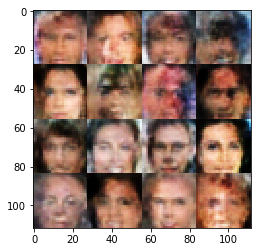

Epoch 1/1... Discriminator Loss: 1.0825... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 0.7093... Generator Loss: 1.5095
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.7720
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 0.9356
Epoch 1/1... Discriminator Loss: 0.8746... Generator Loss: 1.4471
Epoch 1/1... Discriminator Loss: 0.8817... Generator Loss: 1.3548
Epoch 1/1... Discriminator Loss: 0.7585... Generator Loss: 1.4692
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 0.8206... Generator Loss: 1.6537
Epoch 1/1... Discriminator Loss: 1.1472... Generator Loss: 2.1186


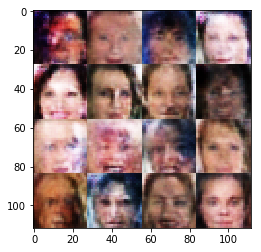

Epoch 1/1... Discriminator Loss: 1.1654... Generator Loss: 0.9184
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 1.2794
Epoch 1/1... Discriminator Loss: 0.9452... Generator Loss: 0.9567
Epoch 1/1... Discriminator Loss: 1.0969... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 0.8732... Generator Loss: 1.2901
Epoch 1/1... Discriminator Loss: 0.7106... Generator Loss: 1.6315
Epoch 1/1... Discriminator Loss: 0.9688... Generator Loss: 1.0640
Epoch 1/1... Discriminator Loss: 1.9096... Generator Loss: 2.2144
Epoch 1/1... Discriminator Loss: 0.9815... Generator Loss: 0.9957
Epoch 1/1... Discriminator Loss: 1.0115... Generator Loss: 0.8805


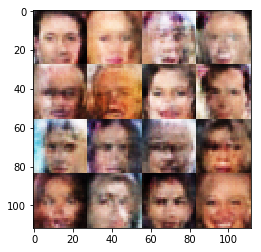

Epoch 1/1... Discriminator Loss: 0.8038... Generator Loss: 1.4157
Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 1.0627
Epoch 1/1... Discriminator Loss: 0.6855... Generator Loss: 1.9176
Epoch 1/1... Discriminator Loss: 0.9294... Generator Loss: 1.0951
Epoch 1/1... Discriminator Loss: 1.1209... Generator Loss: 0.8947
Epoch 1/1... Discriminator Loss: 0.7027... Generator Loss: 1.6735
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 0.7643... Generator Loss: 1.6969
Epoch 1/1... Discriminator Loss: 0.5265... Generator Loss: 2.3778
Epoch 1/1... Discriminator Loss: 1.0078... Generator Loss: 0.9999


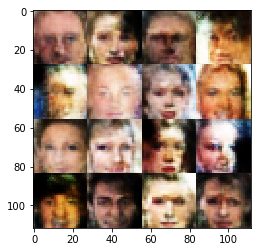

Epoch 1/1... Discriminator Loss: 0.9594... Generator Loss: 0.9681
Epoch 1/1... Discriminator Loss: 0.8041... Generator Loss: 1.2127
Epoch 1/1... Discriminator Loss: 0.7560... Generator Loss: 1.5551
Epoch 1/1... Discriminator Loss: 0.8488... Generator Loss: 1.6926
Epoch 1/1... Discriminator Loss: 1.1723... Generator Loss: 0.7613
Epoch 1/1... Discriminator Loss: 0.8481... Generator Loss: 2.0385
Epoch 1/1... Discriminator Loss: 0.8631... Generator Loss: 1.8961
Epoch 1/1... Discriminator Loss: 0.9060... Generator Loss: 1.0504
Epoch 1/1... Discriminator Loss: 1.0122... Generator Loss: 0.8979
Epoch 1/1... Discriminator Loss: 1.7009... Generator Loss: 0.3506


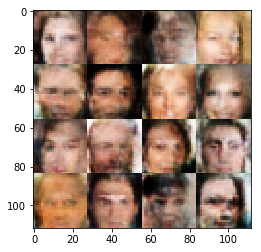

Epoch 1/1... Discriminator Loss: 1.6943... Generator Loss: 0.3813
Epoch 1/1... Discriminator Loss: 1.0824... Generator Loss: 1.0539
Epoch 1/1... Discriminator Loss: 0.9700... Generator Loss: 1.2689
Epoch 1/1... Discriminator Loss: 1.0635... Generator Loss: 1.0117
Epoch 1/1... Discriminator Loss: 0.8391... Generator Loss: 1.3341
Epoch 1/1... Discriminator Loss: 0.7000... Generator Loss: 3.0290
Epoch 1/1... Discriminator Loss: 0.9827... Generator Loss: 1.0487
Epoch 1/1... Discriminator Loss: 0.6573... Generator Loss: 2.0980
Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 0.7946
Epoch 1/1... Discriminator Loss: 0.4988... Generator Loss: 2.9646


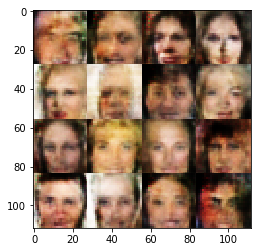

Epoch 1/1... Discriminator Loss: 1.0313... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 0.8319... Generator Loss: 2.1209
Epoch 1/1... Discriminator Loss: 0.9528... Generator Loss: 1.1364
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.9859
Epoch 1/1... Discriminator Loss: 0.8486... Generator Loss: 2.1232
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 1.5438
Epoch 1/1... Discriminator Loss: 0.9176... Generator Loss: 1.6939
Epoch 1/1... Discriminator Loss: 0.6850... Generator Loss: 1.6783
Epoch 1/1... Discriminator Loss: 1.0123... Generator Loss: 1.0190
Epoch 1/1... Discriminator Loss: 0.8197... Generator Loss: 1.1675


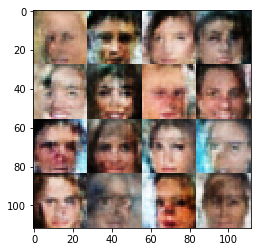

Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.5781
Epoch 1/1... Discriminator Loss: 0.5427... Generator Loss: 2.1492
Epoch 1/1... Discriminator Loss: 0.7514... Generator Loss: 1.4372
Epoch 1/1... Discriminator Loss: 0.9929... Generator Loss: 1.0312
Epoch 1/1... Discriminator Loss: 1.5510... Generator Loss: 0.4267
Epoch 1/1... Discriminator Loss: 0.8632... Generator Loss: 1.2598
Epoch 1/1... Discriminator Loss: 1.0033... Generator Loss: 0.9719
Epoch 1/1... Discriminator Loss: 0.6889... Generator Loss: 2.2549
Epoch 1/1... Discriminator Loss: 0.7828... Generator Loss: 1.4961
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 1.1393


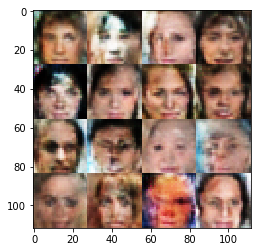

Epoch 1/1... Discriminator Loss: 0.9377... Generator Loss: 1.8582
Epoch 1/1... Discriminator Loss: 0.8862... Generator Loss: 1.6284
Epoch 1/1... Discriminator Loss: 0.7103... Generator Loss: 1.4814
Epoch 1/1... Discriminator Loss: 0.7790... Generator Loss: 1.2130
Epoch 1/1... Discriminator Loss: 0.9536... Generator Loss: 0.9080
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.7422
Epoch 1/1... Discriminator Loss: 0.6320... Generator Loss: 2.0393
Epoch 1/1... Discriminator Loss: 0.8576... Generator Loss: 2.2002
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 1.3861
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.6250


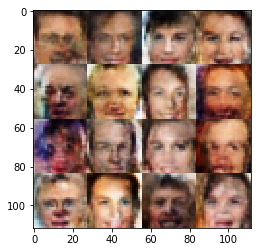

Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 1.1708
Epoch 1/1... Discriminator Loss: 1.0003... Generator Loss: 1.1211
Epoch 1/1... Discriminator Loss: 0.9159... Generator Loss: 1.3757
Epoch 1/1... Discriminator Loss: 0.9141... Generator Loss: 1.4822
Epoch 1/1... Discriminator Loss: 0.8211... Generator Loss: 1.6264
Epoch 1/1... Discriminator Loss: 0.8866... Generator Loss: 1.0009
Epoch 1/1... Discriminator Loss: 0.5728... Generator Loss: 2.2285
Epoch 1/1... Discriminator Loss: 0.6273... Generator Loss: 1.9361
Epoch 1/1... Discriminator Loss: 1.0378... Generator Loss: 1.5270
Epoch 1/1... Discriminator Loss: 0.8482... Generator Loss: 1.3841


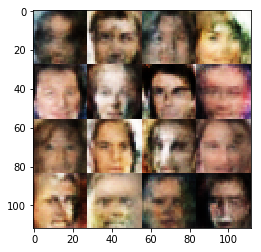

Epoch 1/1... Discriminator Loss: 0.8708... Generator Loss: 1.1047
Epoch 1/1... Discriminator Loss: 0.9192... Generator Loss: 1.1206
Epoch 1/1... Discriminator Loss: 0.8009... Generator Loss: 2.0904
Epoch 1/1... Discriminator Loss: 0.9158... Generator Loss: 1.0869
Epoch 1/1... Discriminator Loss: 1.2619... Generator Loss: 0.6240
Epoch 1/1... Discriminator Loss: 0.9746... Generator Loss: 0.8749


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.